# Data Extraction

In [1]:
import re
import nltk
import numpy as np     
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from textblob import TextBlob
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV , cross_val_score ,RandomizedSearchCV ,KFold
from sklearn.tree import DecisionTreeClassifier ,plot_tree, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler , LabelEncoder ,MinMaxScaler,PolynomialFeatures ,MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, HuberRegressor,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.metrics import accuracy_score  ,mean_squared_error  ,  confusion_matrix  ,  r2_score ,classification_report, roc_curve, auc ,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor , GradientBoostingClassifier
from sklearn.svm import SVC ,LinearSVC,SVR
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import symspellpy as symspell
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_json('News_Category_Dataset.json', lines=True)
pd.set_option('display.max_columns',len(df.columns))
df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df

,short_description,headline,date,link,authors,category
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018-05-26,https://www.huffingtonpost.com/entry/jim-carre...,Ron Dicker,ENTERTAINMENT
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,2018-05-26,https://www.huffingtonpost.com/entry/julianna-...,Ron Dicker,ENTERTAINMENT
...,...,...,...,...,...,...
124984,,Why I Thought I'd Never Live To See 33,2014-04-18,https://www.huffingtonpost.com/entry/a-black-g...,,WOMEN
124985,I often hear people describe cooking for one a...,Five Tips For Cooking For One,2014-04-18,https://www.huffingtonpost.com/entry/five-tips...,"Food Riot, ContributorPlay with your food.",TASTE
124986,,Police Want your Home Video Surveillance Footage,2014-04-18,https://www.huffingtonpost.com/entry/police-wa...,"Robert Siciliano, ContributorPersonal Security...",CRIME
124987,,"Ouch, Natalie Morales",2014-04-18,https://www.huffingtonpost.com/entry/natalie-m...,Katherine Fung,MEDIA


In [3]:
df['category'].value_counts()

category
POLITICS          32739
ENTERTAINMENT     14257
HEALTHY LIVING     6694
QUEER VOICES       4995
BUSINESS           4254
SPORTS             4167
COMEDY             3971
PARENTS            3955
BLACK VOICES       3858
THE WORLDPOST      3664
WOMEN              3490
CRIME              2893
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
IMPACT             2602
WORLDPOST          2579
RELIGION           2556
STYLE              2254
WORLD NEWS         2177
TRAVEL             2145
TASTE              2096
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
SCIENCE            1381
ARTS & CULTURE     1339
TECH               1231
COLLEGE            1144
LATINO VOICES      1129
EDUCATION          1004
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124989 entries, 0 to 124988
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   short_description  124989 non-null  object        
 1   headline           124989 non-null  object        
 2   date               124989 non-null  datetime64[ns]
 3   link               124989 non-null  object        
 4   authors            124989 non-null  object        
 5   category           124989 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 5.7+ MB


In [5]:
df.describe(include="all")

,short_description,headline,date,link,authors,category
count,124989,124989,124989,124989,124989,124989
unique,103905,124560,NaN,124964,19250,31
top,,Sunday Roundup,NaN,https://www.huffingtonpost.comhttp://www.theat...,,POLITICS
freq,19590,90,NaN,2,14151,32739
mean,NaN,NaN,2016-04-05 14:04:54.995559936,NaN,NaN,NaN
min,NaN,NaN,2014-04-18 00:00:00,NaN,NaN,NaN
25%,NaN,NaN,2015-04-13 00:00:00,NaN,NaN,NaN
50%,NaN,NaN,2016-04-01 00:00:00,NaN,NaN,NaN
75%,NaN,NaN,2017-03-22 00:00:00,NaN,NaN,NaN
max,NaN,NaN,2018-05-26 00:00:00,NaN,NaN,NaN


In [6]:
df.drop(columns=['date','link','short_description'], inplace=True)
df

,headline,authors,category
0,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,CRIME
1,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,ENTERTAINMENT
2,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,ENTERTAINMENT
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,ENTERTAINMENT
4,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,ENTERTAINMENT
...,...,...,...
124984,Why I Thought I'd Never Live To See 33,,WOMEN
124985,Five Tips For Cooking For One,"Food Riot, ContributorPlay with your food.",TASTE
124986,Police Want your Home Video Surveillance Footage,"Robert Siciliano, ContributorPersonal Security...",CRIME
124987,"Ouch, Natalie Morales",Katherine Fung,MEDIA


In [7]:
df.duplicated().sum()

371

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(124618, 3)

In [9]:
df.isna().sum().to_frame()

,0
headline,0
authors,0
category,0


# Data Preprocessing

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stopwords(text):
    words = word_tokenize(text)  
    return ' '.join([word for word in words if word.lower() not in stop_words])

def clean_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', text.lower()).strip()  

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])  

def preprocess_text(text):
    text = clean_text(text)  
    text = remove_stopwords(text)  
    return lemmatize_text(text)  

df['headline'] = df['headline'].apply(preprocess_text)
df

,headline,authors,category
0,mass shooting texas last week tv,Melissa Jeltsen,CRIME
1,smith join diplo nicky jam world cup official ...,Andy McDonald,ENTERTAINMENT
2,hugh grant marries first time age,Ron Dicker,ENTERTAINMENT
3,jim carrey blast castrato adam schiff democrat...,Ron Dicker,ENTERTAINMENT
4,julianna margulies us donald trump poop bag pi...,Ron Dicker,ENTERTAINMENT
...,...,...,...
124984,thought id never live see,,WOMEN
124985,five tip cooking one,"Food Riot, ContributorPlay with your food.",TASTE
124986,police want home video surveillance footage,"Robert Siciliano, ContributorPersonal Security...",CRIME
124987,ouch natalie morale,Katherine Fung,MEDIA


In [11]:
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])

print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
df

{'ARTS': 0, 'ARTS & CULTURE': 1, 'BLACK VOICES': 2, 'BUSINESS': 3, 'COLLEGE': 4, 'COMEDY': 5, 'CRIME': 6, 'EDUCATION': 7, 'ENTERTAINMENT': 8, 'FIFTY': 9, 'GOOD NEWS': 10, 'GREEN': 11, 'HEALTHY LIVING': 12, 'IMPACT': 13, 'LATINO VOICES': 14, 'MEDIA': 15, 'PARENTS': 16, 'POLITICS': 17, 'QUEER VOICES': 18, 'RELIGION': 19, 'SCIENCE': 20, 'SPORTS': 21, 'STYLE': 22, 'TASTE': 23, 'TECH': 24, 'THE WORLDPOST': 25, 'TRAVEL': 26, 'WEIRD NEWS': 27, 'WOMEN': 28, 'WORLD NEWS': 29, 'WORLDPOST': 30}


,headline,authors,category
0,mass shooting texas last week tv,Melissa Jeltsen,6
1,smith join diplo nicky jam world cup official ...,Andy McDonald,8
2,hugh grant marries first time age,Ron Dicker,8
3,jim carrey blast castrato adam schiff democrat...,Ron Dicker,8
4,julianna margulies us donald trump poop bag pi...,Ron Dicker,8
...,...,...,...
124984,thought id never live see,,28
124985,five tip cooking one,"Food Riot, ContributorPlay with your food.",23
124986,police want home video surveillance footage,"Robert Siciliano, ContributorPersonal Security...",6
124987,ouch natalie morale,Katherine Fung,15


# by using BOW

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df['headline'], 
    df['category'], 
    test_size=0.2, 
    random_state=2023,
    stratify=df['category']
)
v = CountVectorizer(ngram_range = (1,1))

In [13]:
clf = Pipeline([
     ('vectorizer_bow',v), 
     ('Multi NB', MultinomialNB())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.08      0.14       302
           1       0.50      0.06      0.11       268
           2       0.55      0.25      0.34       772
           3       0.54      0.31      0.39       849
           4       0.50      0.06      0.11       229
           5       0.60      0.25      0.36       792
           6       0.53      0.53      0.53       578
           7       0.44      0.04      0.07       201
           8       0.48      0.83      0.61      2848
           9       0.88      0.03      0.05       280
          10       0.59      0.11      0.18       280
          11       0.57      0.26      0.35       523
          12       0.45      0.60      0.52      1337
          13       0.42      0.08      0.14       520
          14       0.85      0.05      0.09       226
          15       0.70      0.20      0.31       563
          16       0.57      0.44      0.50       779
          17       0.53    

Text(220.72222222222223, 0.5, 'Truth')

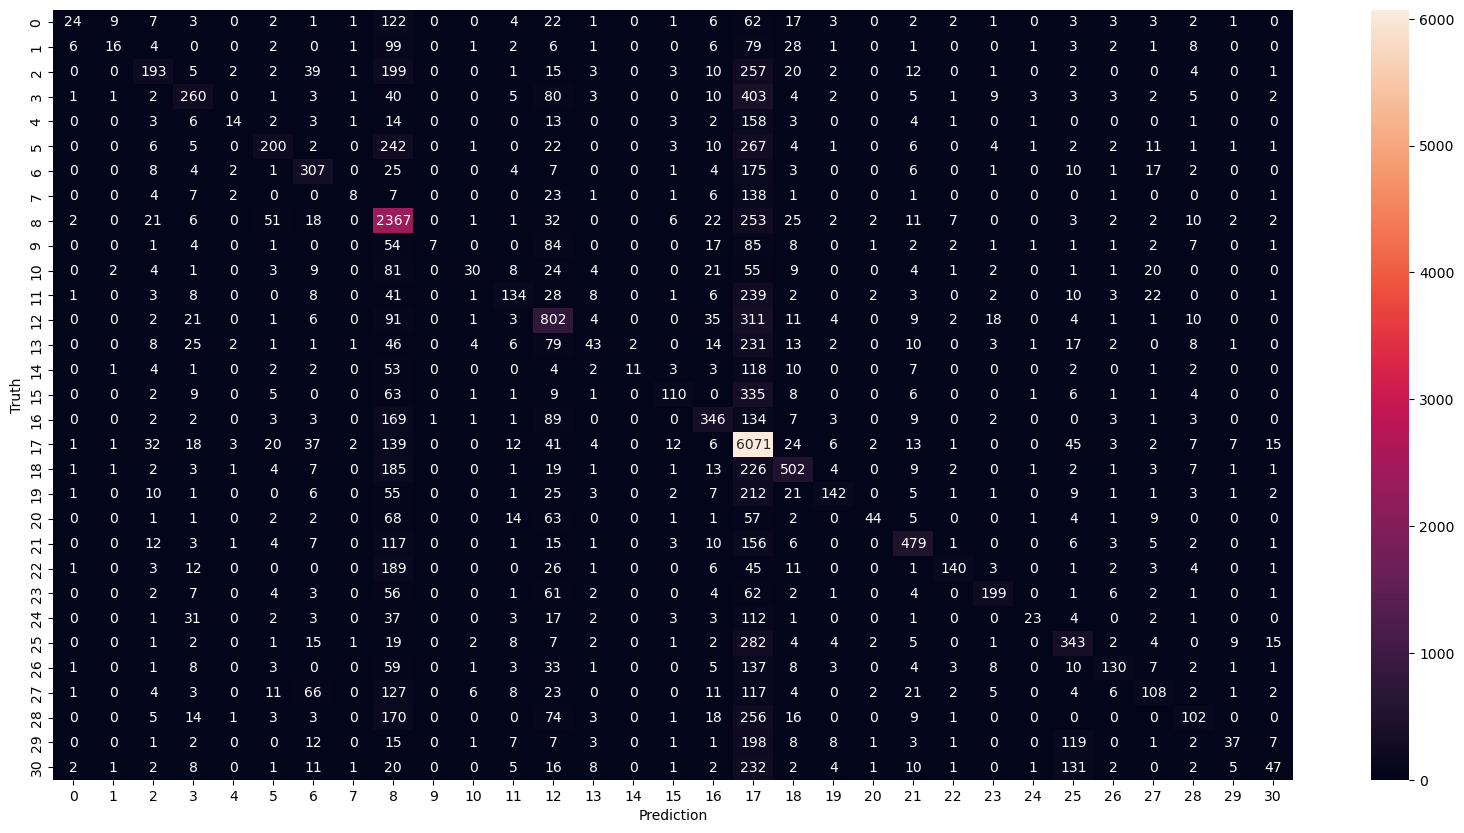

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (20,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [15]:
clf = Pipeline([
     ('vectorizer_bow',v ), 
    ('Complement NB', ComplementNB())           
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.26      0.31       302
           1       0.39      0.24      0.29       268
           2       0.51      0.35      0.41       772
           3       0.52      0.42      0.46       849
           4       0.47      0.39      0.42       229
           5       0.53      0.28      0.37       792
           6       0.48      0.57      0.52       578
           7       0.52      0.30      0.38       201
           8       0.58      0.79      0.67      2848
           9       0.47      0.16      0.24       280
          10       0.36      0.23      0.28       280
          11       0.47      0.42      0.45       523
          12       0.50      0.62      0.56      1337
          13       0.42      0.16      0.23       520
          14       0.63      0.27      0.38       226
          15       0.55      0.36      0.44       563
          16       0.52      0.57      0.55       779
          17       0.70    

In [16]:
clf = Pipeline([
     ('vectorizer_bow', v), 
('Logistic Regression', LogisticRegression(max_iter=1000))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.25      0.30       302
           1       0.44      0.25      0.32       268
           2       0.53      0.40      0.45       772
           3       0.47      0.45      0.46       849
           4       0.57      0.44      0.49       229
           5       0.53      0.40      0.46       792
           6       0.58      0.53      0.56       578
           7       0.46      0.29      0.36       201
           8       0.64      0.74      0.69      2848
           9       0.49      0.25      0.33       280
          10       0.50      0.28      0.36       280
          11       0.52      0.45      0.48       523
          12       0.47      0.66      0.55      1337
          13       0.31      0.22      0.25       520
          14       0.69      0.35      0.47       226
          15       0.53      0.38      0.45       563
          16       0.57      0.62      0.59       779
          17       0.68    

In [17]:
clf = Pipeline([
     ('vectorizer_bow', v), 
 ('Random Forest', RandomForestClassifier(n_estimators=5))
])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.18      0.35      0.24       302
           1       0.15      0.09      0.11       268
           2       0.26      0.29      0.28       772
           3       0.28      0.39      0.32       849
           4       0.28      0.38      0.32       229
           5       0.29      0.33      0.31       792
           6       0.37      0.33      0.35       578
           7       0.23      0.31      0.26       201
           8       0.57      0.56      0.56      2848
           9       0.16      0.14      0.15       280
          10       0.20      0.09      0.13       280
          11       0.32      0.29      0.30       523
          12       0.34      0.51      0.41      1337
          13       0.17      0.13      0.15       520
          14       0.51      0.21      0.30       226
          15       0.41      0.26      0.32       563
          16       0.38      0.48      0.43       779
          17       0.63    

In [18]:
clf = Pipeline([
     ('vectorizer_bow', v), 
     ('MLP', MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, solver='adam', warm_start=True, random_state=42))
])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       302
           1       0.00      0.00      0.00       268
           2       0.56      0.18      0.27       772
           3       0.56      0.17      0.27       849
           4       0.00      0.00      0.00       229
           5       0.73      0.21      0.33       792
           6       0.44      0.46      0.45       578
           7       0.00      0.00      0.00       201
           8       0.41      0.81      0.54      2848
           9       0.00      0.00      0.00       280
          10       0.00      0.00      0.00       280
          11       0.55      0.01      0.02       523
          12       0.38      0.59      0.46      1337
          13       0.00      0.00      0.00       520
          14       0.00      0.00      0.00       226
          15       0.66      0.07      0.12       563
          16       0.49      0.52      0.50       779
          17       0.50    

In [19]:
clf = Pipeline([
     ('vectorizer_bow', v), 
     ('classifier', LogisticRegression(
        C=1.0,             
        solver='saga',      
        penalty='l2',       
        max_iter=1000,     
        n_jobs=-1          
    ))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.25      0.30       302
           1       0.44      0.25      0.32       268
           2       0.53      0.40      0.45       772
           3       0.47      0.45      0.46       849
           4       0.57      0.44      0.49       229
           5       0.53      0.40      0.46       792
           6       0.58      0.53      0.56       578
           7       0.46      0.29      0.36       201
           8       0.64      0.74      0.69      2848
           9       0.49      0.25      0.33       280
          10       0.49      0.28      0.36       280
          11       0.52      0.45      0.48       523
          12       0.47      0.66      0.55      1337
          13       0.31      0.22      0.25       520
          14       0.69      0.35      0.47       226
          15       0.53      0.38      0.45       563
          16       0.57      0.62      0.59       779
          17       0.68    

# by using TF-IDF

In [20]:
v = TfidfVectorizer(ngram_range=(1,1))

In [21]:
clf = Pipeline([
     ('vectorizer_tfidf',v), 
     ('Multi NB', MultinomialNB())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       302
           1       0.00      0.00      0.00       268
           2       0.60      0.01      0.02       772
           3       0.75      0.06      0.10       849
           4       0.00      0.00      0.00       229
           5       0.96      0.03      0.06       792
           6       0.77      0.07      0.13       578
           7       0.00      0.00      0.00       201
           8       0.46      0.77      0.57      2848
           9       0.00      0.00      0.00       280
          10       0.00      0.00      0.00       280
          11       0.33      0.00      0.00       523
          12       0.59      0.31      0.40      1337
          13       0.00      0.00      0.00       520
          14       0.00      0.00      0.00       226
          15       0.90      0.02      0.03       563
          16       0.76      0.09      0.16       779
          17       0.35    

In [22]:
clf = Pipeline([
     ('vectorizer_tfidf',v), 
    ('Complement NB', ComplementNB()) ])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.25      0.29       302
           1       0.40      0.22      0.28       268
           2       0.49      0.30      0.37       772
           3       0.51      0.41      0.45       849
           4       0.47      0.38      0.42       229
           5       0.55      0.30      0.39       792
           6       0.48      0.52      0.50       578
           7       0.50      0.26      0.34       201
           8       0.59      0.79      0.68      2848
           9       0.43      0.19      0.26       280
          10       0.34      0.20      0.25       280
          11       0.45      0.40      0.43       523
          12       0.50      0.62      0.55      1337
          13       0.37      0.14      0.20       520
          14       0.67      0.29      0.40       226
          15       0.57      0.35      0.43       563
          16       0.52      0.55      0.54       779
          17       0.68    

In [23]:
clf = Pipeline([
     ('vectorizer_tfidf',v), 
('Logistic Regression', LogisticRegression(max_iter=1000))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.20      0.27       302
           1       0.50      0.17      0.26       268
           2       0.57      0.34      0.42       772
           3       0.52      0.43      0.47       849
           4       0.52      0.33      0.40       229
           5       0.60      0.37      0.45       792
           6       0.57      0.48      0.52       578
           7       0.52      0.25      0.34       201
           8       0.56      0.80      0.66      2848
           9       0.66      0.16      0.25       280
          10       0.54      0.19      0.28       280
          11       0.54      0.40      0.46       523
          12       0.49      0.66      0.56      1337
          13       0.41      0.19      0.26       520
          14       0.76      0.24      0.36       226
          15       0.61      0.35      0.45       563
          16       0.57      0.61      0.59       779
          17       0.62    

In [24]:
clf = Pipeline([
     ('vectorizer_tfidf',v), 
 ('Random Forest', RandomForestClassifier(n_estimators=5))
])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.30      0.22       302
           1       0.17      0.17      0.17       268
           2       0.25      0.29      0.27       772
           3       0.27      0.39      0.32       849
           4       0.29      0.34      0.31       229
           5       0.34      0.34      0.34       792
           6       0.34      0.38      0.36       578
           7       0.28      0.27      0.28       201
           8       0.52      0.60      0.55      2848
           9       0.17      0.15      0.16       280
          10       0.17      0.08      0.11       280
          11       0.32      0.32      0.32       523
          12       0.36      0.52      0.42      1337
          13       0.20      0.13      0.16       520
          14       0.40      0.14      0.21       226
          15       0.43      0.26      0.33       563
          16       0.41      0.45      0.43       779
          17       0.65    

In [25]:
clf = Pipeline([
     ('vectorizer_tfidf',v), 
     ('MLP', MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, solver='adam', warm_start=True, random_state=42))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       302
           1       0.00      0.00      0.00       268
           2       0.00      0.00      0.00       772
           3       0.00      0.00      0.00       849
           4       0.00      0.00      0.00       229
           5       0.00      0.00      0.00       792
           6       0.00      0.00      0.00       578
           7       0.00      0.00      0.00       201
           8       0.00      0.00      0.00      2848
           9       0.00      0.00      0.00       280
          10       0.00      0.00      0.00       280
          11       0.00      0.00      0.00       523
          12       0.00      0.00      0.00      1337
          13       0.00      0.00      0.00       520
          14       0.00      0.00      0.00       226
          15       0.00      0.00      0.00       563
          16       0.00      0.00      0.00       779
          17       0.76    

In [26]:
clf = Pipeline([
     ('vectorizer_tfidf',v), 
     ('classifier', LogisticRegression(
        C=1.0,             
        solver='saga',      
        penalty='l2',       
        max_iter=1000,     
        n_jobs=-1          
    ))
])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.20      0.27       302
           1       0.50      0.17      0.26       268
           2       0.57      0.34      0.42       772
           3       0.52      0.43      0.47       849
           4       0.52      0.33      0.40       229
           5       0.60      0.37      0.46       792
           6       0.57      0.48      0.52       578
           7       0.52      0.25      0.34       201
           8       0.56      0.80      0.66      2848
           9       0.66      0.16      0.25       280
          10       0.54      0.19      0.28       280
          11       0.54      0.40      0.46       523
          12       0.49      0.66      0.56      1337
          13       0.41      0.19      0.26       520
          14       0.76      0.24      0.36       226
          15       0.61      0.35      0.45       563
          16       0.57      0.61      0.59       779
          17       0.62    

In [27]:
news_examples = [
    "Apple unveils revolutionary quantum processor with 1000x speed boost",
    
    "President signs landmark climate bill into law after bipartisan approval",
    
    "FIFA announces 2030 World Cup will be hosted across three continents",
    
    "New study confirms Mediterranean diet reduces heart disease risk by 30%",
    
    "Disney announces live-action remake of classic animated film for 2025 release"
]

preprocessed_news = [preprocess_text(headline) for headline in news_examples]

for original, processed in zip(news_examples, preprocessed_news):
    print(f"Original: {original[:50]}...")
    print(f"Processed: {processed[:50]}...\n")

Original: Apple unveils revolutionary quantum processor with...
Processed: apple unveils revolutionary quantum processor x sp...

Original: President signs landmark climate bill into law aft...
Processed: president sign landmark climate bill law bipartisa...

Original: FIFA announces 2030 World Cup will be hosted acros...
Processed: fifa announces world cup hosted across three conti...

Original: New study confirms Mediterranean diet reduces hear...
Processed: new study confirms mediterranean diet reduces hear...

Original: Disney announces live-action remake of classic ani...
Processed: disney announces liveaction remake classic animate...



In [28]:
new_examples = [
    "NASA discovers water on Mars",
    "Manchester United wins Champions League",
    "New COVID variant detected in Europe",
    "Apple releases new iPhone with holographic display",
    "Global climate summit reaches historic agreement"
]
preprocessed_news = [preprocess_text(headline) for headline in new_examples]
predictions = clf.predict(preprocessed_news)

for text, category in zip(preprocessed_news, predictions):
    print(f"🔷 News: '{text}'")
    print(f"🏷️ Predicted Category: {category}\n")

🔷 News: 'nasa discovers water mar'
🏷️ Predicted Category: 20

🔷 News: 'manchester united win champion league'
🏷️ Predicted Category: 21

🔷 News: 'new covid variant detected europe'
🏷️ Predicted Category: 17

🔷 News: 'apple release new iphone holographic display'
🏷️ Predicted Category: 24

🔷 News: 'global climate summit reach historic agreement'
🏷️ Predicted Category: 11



In [29]:
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'ARTS': 0, 'ARTS & CULTURE': 1, 'BLACK VOICES': 2, 'BUSINESS': 3, 'COLLEGE': 4, 'COMEDY': 5, 'CRIME': 6, 'EDUCATION': 7, 'ENTERTAINMENT': 8, 'FIFTY': 9, 'GOOD NEWS': 10, 'GREEN': 11, 'HEALTHY LIVING': 12, 'IMPACT': 13, 'LATINO VOICES': 14, 'MEDIA': 15, 'PARENTS': 16, 'POLITICS': 17, 'QUEER VOICES': 18, 'RELIGION': 19, 'SCIENCE': 20, 'SPORTS': 21, 'STYLE': 22, 'TASTE': 23, 'TECH': 24, 'THE WORLDPOST': 25, 'TRAVEL': 26, 'WEIRD NEWS': 27, 'WOMEN': 28, 'WORLD NEWS': 29, 'WORLDPOST': 30}


In [30]:
joblib.dump(clf, 'news_classifier_pipeline.joblib')

['news_classifier_pipeline.joblib']

In [31]:
clf_loaded = joblib.load('news_classifier_pipeline.joblib')

new_headline = "Tesla announces breakthrough in battery technology"
predicted_category = clf_loaded.predict([new_headline])[0]
print(f"Predicted category: {predicted_category}")

Predicted category: 3
